In [8]:
import numpy as np
#np.save('U_300.npy',U_300)
#np.save('V_300.npy',V_300)
U=np.load('U_300.npy')
V=np.load('V_300.npy')
print(U.shape)

(10103, 300)


In [5]:
from scipy import io
import sys
sys.path.append("..")
from utils import test_train_split, evaluate_model_torch, subtract_spont, corrcoef, PCA,zscore
data = io.loadmat('/home/maria/Documents/EnsemblePursuit/SAND9/data/natimg2800_M170717_MP034_2017-09-11.mat')
resp = data['stim'][0]['resp'][0]
spont =data['stim'][0]['spont'][0]
X=subtract_spont(spont,resp).T
print(X.shape)
X=zscore(X.T).T
print(X.shape)

(10103, 5880)
(10103, 5880)


0.9999149


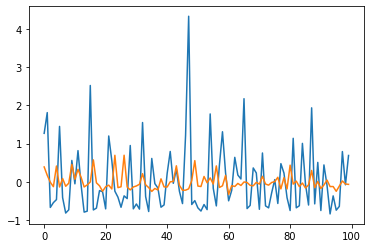

In [10]:
import matplotlib.pyplot as plt
plt.plot(X[0,:100])
print(np.std(X[0,:]))
plt.plot(V[0,:100])

In [19]:
print(U.shape)
list_of_neurons=np.nonzero(U[:,0])
print(list_of_neurons)
list_of_neurons=list(list_of_neurons[0])

(10103, 300)
(array([  36,   58,  180,  689,  882, 1039, 1165, 1428, 1489, 2018, 2754,
       3075, 3377, 3470, 5636, 5665, 7098]),)


36
58


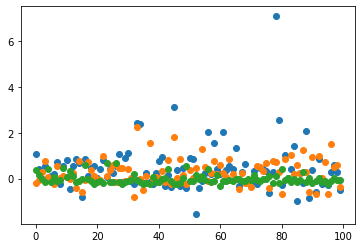

In [26]:
list_of_neurons_=[36,58]
for neuron in list_of_neurons_:
    print(neuron)
    plt.plot(X[neuron,:100],'o')
plt.plot(V[0,:100],'o')